In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train,x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=4)


Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8770 - loss: 0.4349
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9618 - loss: 0.1282
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9761 - loss: 0.0830
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9827 - loss: 0.0591


In [ ]:
model.history.history

{'accuracy': [0.9244333505630493,
  0.9643166661262512,
  0.9758833050727844,
  0.9815999865531921],
 'loss': [0.26453477144241333,
  0.11922798305749893,
  0.0821862742304802,
  0.06084086000919342]}

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc*100:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.1008
Test accuracy: 97.52


In [ ]:
prediction = model.predict(x_test)
print( prediction)
print(f"prediction - {prediction.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.7270693e-07 1.7186976e-09 7.3013384e-06 ... 9.9992257e-01
  7.2861502e-07 1.4090372e-06]
 [4.1521528e-08 6.0726493e-06 9.9990207e-01 ... 7.1804148e-14
  1.2526244e-06 3.4620501e-11]
 [6.8342098e-07 9.9923611e-01 1.6216665e-04 ... 8.2306375e-05
  4.5892209e-04 2.6910786e-06]
 ...
 [5.1882570e-10 2.7201194e-11 2.1463706e-09 ... 1.9342197e-05
  5.1107079e-05 1.3314234e-04]
 [8.8973087e-07 8.2245849e-11 7.8941485e-11 ... 4.2752131e-09
  3.5583047e-04 7.3001316e-10]
 [5.0183631e-09 1.2143281e-09 2.7688540e-07 ... 7.6631389e-11
  7.3504236e-10 2.0546304e-10]]
prediction - (10000, 10)


In [ ]:
print(np.argmax(prediction[0]))

7


In [ ]:
prediction[0].sum()

np.float32(0.9999998)

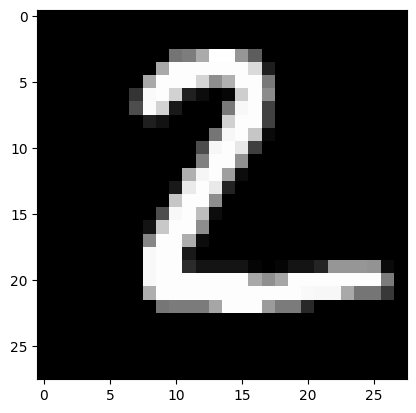

In [ ]:
plt.imshow(x_test[1],cmap='gray')

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
784*128

100352

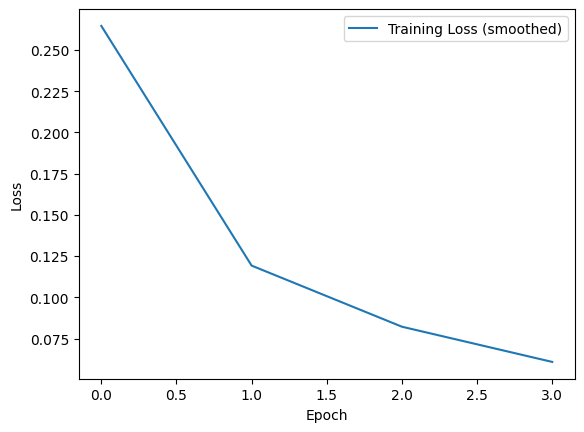

In [ ]:
plt.plot(model.history.history['loss'], label='Training Loss (smoothed)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


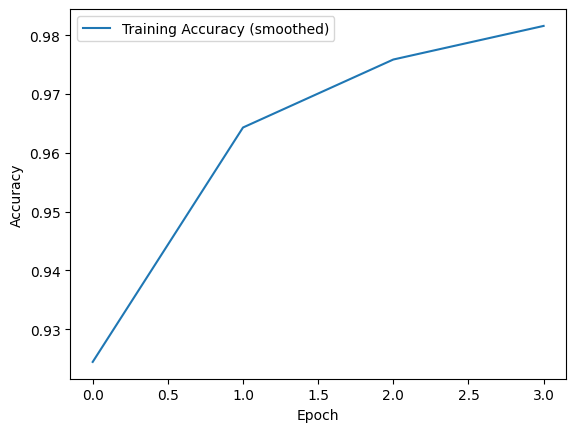

In [ ]:
plt.plot(model.history.history['accuracy'], label='Training Accuracy (smoothed)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()